# データの読み込み

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
import japanize_matplotlib

In [4]:
import seaborn as sns
sns.set

<function seaborn.rcmod.set(*args, **kwargs)>

In [5]:
import datetime

In [6]:
pd.read_excel('data_explanation.xlsx', sheet_name=0)

,ファイル名,内容
0,train.csv,訓練用データ
1,test.csv,評価用データ
2,weather.csv,天候データ
3,sample_submission.csv,投稿データフォーマット


In [7]:
pd.read_excel('data_explanation.xlsx', sheet_name=1)

,ファイル名,カラム名,内容
0,train.csv,kind,野菜の種類
1,NaN,date,日付
2,NaN,amount,卸売数量合計（合計の意味は、複数産地のものがあればその合計をとっているの意味）
3,NaN,mode_price,卸売価格中央値（中央値の意味は、複数産地のものがあればその中央値をとっているの意味）
4,NaN,area,"産地。複数産地のものが売られていた場合は""_""で結合"
5,test.csv,kind,野菜の種類
6,NaN,date,日付
7,NaN,area,"産地。複数産地のものが売られていた場合は""_""で結合"
8,weather.csv,date,日付
9,NaN,mean_temp,平均気温（℃）


In [8]:
import openpyxl
data_exp = openpyxl.load_workbook('data_explanation.xlsx')
print(data_exp.sheetnames)

['データ説明', '\u3000カラム説明']


In [9]:
train_raw = pd.read_csv('train.csv')
train_raw

,kind,date,amount,mode_price,area
0,だいこん,20051107,201445,735.0,千葉
1,だいこん,20051108,189660,840.0,千葉_各地_青森
2,だいこん,20051110,218166,735.0,千葉_各地_青森
3,だいこん,20051111,182624,682.5,千葉_青森
4,だいこん,20051112,220691,682.5,千葉_青森
...,...,...,...,...,...
97777,しめじ,20170526,17231,48.5,新潟_長野
97778,しめじ,20170527,17105,48.5,新潟_長野
97779,しめじ,20170529,12406,48.5,新潟_長野
97780,しめじ,20170530,12320,48.5,新潟_長野


In [10]:
test_raw = pd.read_csv('test.csv')
test_raw

,kind,date,area
0,だいこん,20220502,千葉_各地_青森
1,だいこん,20220506,千葉_各地_青森
2,だいこん,20220507,千葉_各地_青森
3,だいこん,20220509,千葉_各地_青森
4,だいこん,20220510,千葉_各地_青森
...,...,...,...
315,ミニトマト,20220526,各地_愛知
316,ミニトマト,20220527,各地_愛知
317,ミニトマト,20220528,各地_愛知
318,ミニトマト,20220530,各地_愛知


In [11]:
weather_raw = pd.read_csv('weather.csv')
weather_raw

,date,mean_temp,max_temp,max_temp_time,min_temp,min_temp_time,sum_rain,sun_time,mean_humid,area
0,20041106,13.1,20.1,2004/11/6 12:50,8.1,2004/11/6 05:31,5.0,1.6,77.0,青森
1,20041107,9.6,12.5,2004/11/7 13:40,5.4,2004/11/7 22:17,0.0,4.1,63.0,青森
2,20041108,9.0,15.5,2004/11/8 12:51,3.2,2004/11/8 06:28,0.0,8.9,72.0,青森
3,20041109,12.2,17.7,2004/11/9 14:40,5.7,2004/11/9 02:49,1.5,1.2,85.0,青森
4,20041110,11.6,16.4,2004/11/10 14:42,6.9,2004/11/10 06:23,0.0,7.5,89.0,青森
...,...,...,...,...,...,...,...,...,...,...
204315,20220426,21.3,23.6,2022/4/26 14:27,17.9,2022/4/26 04:17,2.5,0.0,89.0,東京
204316,20220427,23.0,27.7,2022/4/27 13:12,18.9,2022/4/28 0:00,0.5,1.6,79.0,東京
204317,20220428,16.9,21.1,2022/4/28 15:03,14.2,2022/4/28 22:40,0.0,5.5,57.0,東京
204318,20220429,12.9,16.4,2022/4/29 09:21,9.0,2022/4/29 23:55,40.0,0.2,86.0,東京


In [12]:
sub_raw = pd.read_csv('sample_submission.csv')
sub_raw

,kind,date,mode_price
0,だいこん,20220502,0
1,だいこん,20220506,0
2,だいこん,20220507,0
3,だいこん,20220509,0
4,だいこん,20220510,0
...,...,...,...
315,ミニトマト,20220526,0
316,ミニトマト,20220527,0
317,ミニトマト,20220528,0
318,ミニトマト,20220530,0


## trainデータ

In [13]:
train = train_raw.copy()

### dateをdatetime型に変換

In [14]:
train['date'] = train['date'].astype(str)

In [15]:
train['date'] = pd.to_datetime(train['date'])

## testデータ

In [16]:
test = test_raw.copy()

### dateをdatetime型に変換

In [17]:
test['date'] = test['date'].astype(str)
test['date'] = pd.to_datetime(test['date'])

## weatherデータ

In [18]:
weather = weather_raw.copy()

### dateをdatetime型に変換

In [19]:
weather['date'] = weather['date'].astype(str)
weather['date'] = pd.to_datetime(weather['date'])

## submitデータ

### dateをdatetime型に変換

In [20]:
sub = sub_raw.copy()

In [21]:
sub['date'] = sub['date'].astype(str)
sub['date'] = pd.to_datetime(sub['date'])

# LSTM_submission

## 現状の課題

学習データの期間をどうするか問題

areaの「各地」「_」をreplaceで消して、ラベルエンコーディング

areaの値をもとにweatherのデータを紐づけ

In [22]:
train.kind.nunique(), test.kind.nunique()

(44, 16)

## 欠損値の数を確認

In [23]:
print('*** train ***\n', train.isnull().sum())
print('*** test ***\n', test.isnull().sum())
print('*** sample_submission ***\n', sub.isnull().sum())
print('*** weather ***\n', weather.isnull().sum())

*** train ***
 kind          0
date          0
amount        0
mode_price    0
area          0
dtype: int64
*** test ***
 kind    0
date    0
area    0
dtype: int64
*** sample_submission ***
 kind          0
date          0
mode_price    0
dtype: int64
*** weather ***
 date               0
mean_temp        367
max_temp         367
max_temp_time    367
min_temp         368
min_temp_time    368
sum_rain         369
sun_time         432
mean_humid       398
area               0
dtype: int64


## sample_submissionに含まれるすべての種類がtrainデータに含まれているか確認

In [24]:
sub_kind = sub.kind.unique()
test_kind = test.kind.unique()
train_kind = train.kind.unique()
print("submissionデータ種類：", len(sub_kind), "テストデータ種類：", len(test_kind), "訓練データ種類：", len(train_kind))

submissionデータ種類： 16 テストデータ種類： 16 訓練データ種類： 44


## trainにあってtestにないkind

In [25]:
set(train_kind) - set(test_kind)

{'いんげん',
 'うど',
 'うめ',
 'えだまめ',
 'えのきだけ',
 'かぶ',
 'かぼちゃ',
 'ごぼう',
 'さつまいも',
 'さといも',
 'さやえんどう',
 'しめじ',
 'しゅんぎく',
 'たけのこ',
 'たまねぎ',
 'とうもろこし',
 'なす',
 'なのはな',
 'にら',
 'ふき',
 'まつたけ',
 'みずな',
 'れんこん',
 'アスパラガス',
 'オクラ',
 'ピース',
 'ブロッコリー',
 'レイシにがうり'}

In [26]:
set(sub_kind) - set(test_kind)

set()

In [27]:
train_data = pd.DataFrame({"kind": test_kind})
print("訓練データ数：", len(train_data))
train_data.head()

訓練データ数： 16


,kind
0,だいこん
1,にんじん
2,キャベツ
3,レタス
4,はくさい


In [28]:
train["date"] = train["date"].astype(str)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97782 entries, 0 to 97781
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   kind        97782 non-null  object 
 1   date        97782 non-null  object 
 2   amount      97782 non-null  int64  
 3   mode_price  97782 non-null  float64
 4   area        97782 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 3.7+ MB


In [29]:
# 辞書型に変換
train_data_dict = train.set_index(['kind', 'date'])['mode_price'].to_dict()
list(train_data_dict)[0:5]

[('だいこん', '2005-11-07'),
 ('だいこん', '2005-11-08'),
 ('だいこん', '2005-11-10'),
 ('だいこん', '2005-11-11'),
 ('だいこん', '2005-11-12')]

In [30]:
date_cols = pd.date_range(start='2017-04-30', end='2022-04-30').date.astype(str)

for col in date_cols:
    train_data[col] = train_data.kind.apply(lambda x: train_data_dict[(x, col)] 
                                                    if (x, col) in train_data_dict.keys()
                                                    else 0).astype(np.int32)
print('訓練データの行数と列数：', train_data.shape)
train_data

/var/folders/7x/26pb54zs00x65mbywr82xnnm0000gn/T/ipykernel_31192/4249081629.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_data[col] = train_data.kind.apply(lambda x: train_data_dict[(x, col)]
/var/folders/7x/26pb54zs00x65mbywr82xnnm0000gn/T/ipykernel_31192/4249081629.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_data[col] = train_data.kind.apply(lambda x: train_data_dict[(x, col)]
/var/folders/7x/26pb54zs00x65mbywr82xnnm0000gn/T/ipykernel_31192/4249081629.py:4: PerformanceWarning: DataFrame is highly frag

訓練データの行数と列数： (16, 1828)


/var/folders/7x/26pb54zs00x65mbywr82xnnm0000gn/T/ipykernel_31192/4249081629.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_data[col] = train_data.kind.apply(lambda x: train_data_dict[(x, col)]
/var/folders/7x/26pb54zs00x65mbywr82xnnm0000gn/T/ipykernel_31192/4249081629.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  train_data[col] = train_data.kind.apply(lambda x: train_data_dict[(x, col)]
/var/folders/7x/26pb54zs00x65mbywr82xnnm0000gn/T/ipykernel_31192/4249081629.py:4: PerformanceWarning: DataFrame is highly frag

,kind,2017-04-30,2017-05-01,2017-05-02,2017-05-03,2017-05-04,2017-05-05,2017-05-06,2017-05-07,2017-05-08,...,2022-04-21,2022-04-22,2022-04-23,2022-04-24,2022-04-25,2022-04-26,2022-04-27,2022-04-28,2022-04-29,2022-04-30
0,だいこん,0,1080,1134,0,0,0,1188,0,1080,...,1026,972,918,0,864,756,0,864,918,864
1,にんじん,0,1800,1404,0,0,0,1944,0,1674,...,1080,1296,1080,0,1080,1512,0,1404,1512,1512
2,キャベツ,0,1300,972,0,0,0,864,0,864,...,1080,972,972,0,972,972,0,756,756,1080
3,レタス,0,1782,1566,0,0,0,1512,0,1404,...,1188,1188,1296,0,1188,864,0,864,972,864
4,はくさい,0,1404,1296,0,0,0,1404,0,1296,...,1188,972,864,0,432,1134,0,1134,972,648
5,こまつな,0,108,113,0,0,0,119,0,119,...,140,124,97,0,119,130,0,86,81,81
6,ほうれんそう,0,102,97,0,0,0,113,0,81,...,97,102,97,0,97,86,0,86,81,108
7,ねぎ,0,1836,1836,0,0,0,1728,0,1836,...,1512,1620,1512,0,1620,1620,0,1620,1728,1728
8,きゅうり,0,1296,1296,0,0,0,1188,0,1080,...,1296,1404,1404,0,1404,1512,0,1404,1404,1404
9,トマト,0,972,972,0,0,0,972,0,972,...,1296,1296,1296,0,1296,1188,0,1188,1188,1080


In [31]:
train_data_T = train_data.T.replace(0, np.nan)

## null値を野菜の各種類ごとの平均値で補完

In [32]:
for col in range(len(train_data_T.columns.values)):
    train_data_T[col] = train_data_T[col].fillna(round(train_data_T[col].iloc[1: 1828].mean()))

train_data = train_data_T.T

In [33]:
# 訓練データ確認
print('訓練データの行数と列数：', train_data.shape)
train_data.head()

訓練データの行数と列数： (16, 1828)


,kind,2017-04-30,2017-05-01,2017-05-02,2017-05-03,2017-05-04,2017-05-05,2017-05-06,2017-05-07,2017-05-08,...,2022-04-21,2022-04-22,2022-04-23,2022-04-24,2022-04-25,2022-04-26,2022-04-27,2022-04-28,2022-04-29,2022-04-30
0,だいこん,1007,1080,1134,1007,1007,1007,1188,1007,1080,...,1026,972,918,1007,864,756,1007,864,918,864
1,にんじん,1409,1800,1404,1409,1409,1409,1944,1409,1674,...,1080,1296,1080,1409,1080,1512,1409,1404,1512,1512
2,キャベツ,969,1300,972,969,969,969,864,969,864,...,1080,972,972,969,972,972,969,756,756,1080
3,レタス,1710,1782,1566,1710,1710,1710,1512,1710,1404,...,1188,1188,1296,1710,1188,864,1710,864,972,864
4,はくさい,1105,1404,1296,1105,1105,1105,1404,1105,1296,...,1188,972,864,1105,432,1134,1105,1134,972,648


In [34]:
len(pd.date_range("2022-05-02", "2022-05-31"))

30

In [35]:
def log_transform(data):
    data = data.applymap(lambda x: 0 if x==-1 else x)
    data.iloc[:, 1:1828] = np.log1p(data.iloc[:, 1:1828])
    return data

TRdata = log_transform(train_data)
TRdata.head(10)

,kind,2017-04-30,2017-05-01,2017-05-02,2017-05-03,2017-05-04,2017-05-05,2017-05-06,2017-05-07,2017-05-08,...,2022-04-21,2022-04-22,2022-04-23,2022-04-24,2022-04-25,2022-04-26,2022-04-27,2022-04-28,2022-04-29,2022-04-30
0,だいこん,6.915723,6.985642,7.034388,6.915723,6.915723,6.915723,7.080868,6.915723,6.985642,...,6.934397,6.880384,6.823286,6.915723,6.762730,6.629363,6.915723,6.762730,6.823286,6.762730
1,にんじん,7.251345,7.496097,7.247793,7.251345,7.251345,7.251345,7.573017,7.251345,7.423568,...,6.985642,7.167809,6.985642,7.251345,6.985642,7.321850,7.251345,7.247793,7.321850,7.321850
2,キャベツ,6.877296,7.170888,6.880384,6.877296,6.877296,6.877296,6.762730,6.877296,6.762730,...,6.985642,6.880384,6.880384,6.877296,6.880384,6.880384,6.877296,6.629363,6.629363,6.985642
3,レタス,7.444833,7.486053,7.356918,7.444833,7.444833,7.444833,7.321850,7.444833,7.247793,...,7.080868,7.080868,7.167809,7.444833,7.080868,6.762730,7.444833,6.762730,6.880384,6.762730
4,はくさい,7.008505,7.247793,7.167809,7.008505,7.008505,7.008505,7.247793,7.008505,7.167809,...,7.080868,6.880384,6.762730,7.008505,6.070738,7.034388,7.008505,7.034388,6.880384,6.475433
5,こまつな,4.955827,4.691348,4.736198,4.955827,4.955827,4.955827,4.787492,4.955827,4.787492,...,4.948760,4.828314,4.584967,4.955827,4.787492,4.875197,4.955827,4.465908,4.406719,4.406719
6,ほうれんそう,4.753590,4.634729,4.584967,4.753590,4.753590,4.753590,4.736198,4.753590,4.406719,...,4.584967,4.634729,4.584967,4.753590,4.584967,4.465908,4.753590,4.465908,4.406719,4.691348
7,ねぎ,7.522400,7.515889,7.515889,7.522400,7.522400,7.522400,7.455298,7.522400,7.515889,...,7.321850,7.390799,7.321850,7.522400,7.390799,7.390799,7.522400,7.390799,7.455298,7.455298
8,きゅうり,7.470224,7.167809,7.167809,7.470224,7.470224,7.470224,7.080868,7.470224,6.985642,...,7.167809,7.247793,7.247793,7.470224,7.247793,7.321850,7.470224,7.247793,7.247793,7.247793
9,トマト,7.295735,6.880384,6.880384,7.295735,7.295735,7.295735,6.880384,7.295735,6.880384,...,7.167809,7.167809,7.167809,7.295735,7.167809,7.080868,7.295735,7.080868,7.080868,6.985642


In [36]:
from sklearn.model_selection import train_test_split

def generate_walkforward_data(data, input_seq_len, output_seq_len, date_start_col, date_end_col, val_data=0.05):
    date_cols = np.r_[date_start_col: date_end_col]
    train_points = len(date_cols) - input_seq_len - output_seq_len
    input_seqs = []
    output_seqs = []
    for i in range(train_points+1):
        inp_start = i + date_start_col
        inp_end = inp_start + input_seq_len
        out_end = inp_end + output_seq_len 
        input_seqs.append( data.iloc[: , inp_start:inp_end].values.reshape(1, -1, input_seq_len).transpose(0, 2, 1) )
        output_seqs.append( data.iloc[: , inp_end:out_end].values.reshape(1, -1, output_seq_len).transpose(0, 2, 1) )
        
    input_seqs = np.concatenate(input_seqs)
    output_seqs = np.concatenate(output_seqs)
    
    train_x, val_x, train_y, val_y = train_test_split(input_seqs, output_seqs, test_size=val_data, random_state=1126)
    
    return train_x, val_x, train_y, val_y

In [37]:
input_seq_len = 30
output_seq_len = 30
train_x, val_x, train_y, val_y = generate_walkforward_data(TRdata, input_seq_len, output_seq_len, 1, 1828)
print(train_x.shape, train_y.shape, val_x.shape, val_y.shape)

(1679, 30, 16) (1679, 30, 16) (89, 30, 16) (89, 30, 16)


##  モデル作成用ライブラリの読み込み

In [38]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, LSTM, TimeDistributed, RepeatVector
from tensorflow.keras.optimizers import Adam
from keras.callbacks import EarlyStopping

In [39]:
def buildManyToManyModel(train_data):
    model = Sequential()
    model.add(LSTM(10, input_shape = (train_data.shape[1], train_data.shape[2]),return_sequences=True))
    model.add(TimeDistributed(Dense(16)))
    model.compile(loss="mse", optimizer="adam")
    return model

In [40]:
model = buildManyToManyModel(train_x)
model.summary()

Metal device set to: Apple M1


2022-06-19 19:23:44.630591: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-06-19 19:23:44.630667: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 10)            1080      
                                                                 
 time_distributed (TimeDistr  (None, 30, 16)           176       
 ibuted)                                                         
                                                                 
Total params: 1,256
Trainable params: 1,256
Non-trainable params: 0
_________________________________________________________________


In [41]:
callback = EarlyStopping(monitor="loss", patience=3, verbose=1, mode="auto")
history = model.fit(train_x, train_y, epochs=1000, batch_size=50, validation_data=(val_x, val_y), callbacks=[callback])

Epoch 1/1000


2022-06-19 19:23:45.226976: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-06-19 19:23:45.878919: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-19 19:23:46.023506: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-19 19:23:48.190743: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


34/34 [==============================] - 5s 31ms/step - loss: 40.6593 - val_loss: 36.7094
Epoch 2/1000
 1/34 [..............................] - ETA: 0s - loss: 36.4417

2022-06-19 19:23:49.782811: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-19 19:23:49.823485: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


34/34 [==============================] - 0s 13ms/step - loss: 33.4602 - val_loss: 29.8168
Epoch 3/1000
34/34 [==============================] - 0s 13ms/step - loss: 27.4873 - val_loss: 25.2876
Epoch 4/1000
34/34 [==============================] - 0s 14ms/step - loss: 23.5271 - val_loss: 21.7312
Epoch 5/1000
34/34 [==============================] - 0s 13ms/step - loss: 20.2286 - val_loss: 18.6880
Epoch 6/1000
34/34 [==============================] - 0s 13ms/step - loss: 17.3842 - val_loss: 16.0486
Epoch 7/1000
34/34 [==============================] - 0s 12ms/step - loss: 14.9122 - val_loss: 13.7507
Epoch 8/1000
34/34 [==============================] - 0s 12ms/step - loss: 12.7594 - val_loss: 11.7499
Epoch 9/1000
34/34 [==============================] - 0s 12ms/step - loss: 10.8860 - val_loss: 10.0102
Epoch 10/1000
34/34 [==============================] - 0s 12ms/step - loss: 9.2591 - val_loss: 8.5016
Epoch 11/1000
34/34 [==============================] - 0s 12ms/step - loss: 7.8502 - va

In [42]:
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


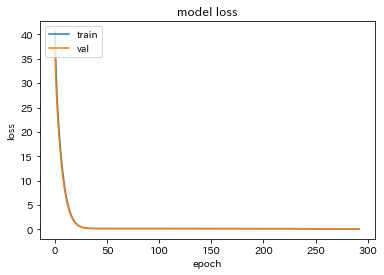

In [43]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')

In [44]:
test_output = model.predict(train_x)
test_output.shape

2022-06-19 19:25:53.384836: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.
2022-06-19 19:25:53.422995: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


(1679, 30, 16)

In [45]:
train_points = 1827 - 30 - 30
date_start_col = 1
inp_start = train_points + date_start_col
inp_end = inp_start + input_seq_len
out_end = inp_end + output_seq_len 
last_train_day = TRdata.iloc[: , inp_end:out_end]
last_train_day

,2022-04-01,2022-04-02,2022-04-03,2022-04-04,2022-04-05,2022-04-06,2022-04-07,2022-04-08,2022-04-09,2022-04-10,...,2022-04-21,2022-04-22,2022-04-23,2022-04-24,2022-04-25,2022-04-26,2022-04-27,2022-04-28,2022-04-29,2022-04-30
0,6.762730,6.762730,6.915723,6.762730,6.823286,6.915723,6.762730,6.762730,6.762730,6.915723,...,6.934397,6.880384,6.823286,6.915723,6.762730,6.629363,6.915723,6.762730,6.823286,6.762730
1,7.285507,7.285507,7.251345,7.080868,7.285507,7.251345,7.125283,7.167809,7.285507,7.251345,...,6.985642,7.167809,6.985642,7.251345,6.985642,7.321850,7.251345,7.247793,7.321850,7.321850
2,6.985642,7.080868,6.877296,7.080868,7.167809,6.877296,6.985642,7.080868,7.167809,6.877296,...,6.985642,6.880384,6.880384,6.877296,6.880384,6.880384,6.877296,6.629363,6.629363,6.985642
3,7.321850,7.356918,7.444833,7.390799,7.390799,7.444833,7.321850,7.455298,7.573017,7.444833,...,7.080868,7.080868,7.167809,7.444833,7.080868,6.762730,7.444833,6.762730,6.880384,6.762730
4,7.455298,7.486053,7.008505,7.321850,7.544861,7.008505,7.208600,7.390799,7.080868,7.008505,...,7.080868,6.880384,6.762730,7.008505,6.070738,7.034388,7.008505,7.034388,6.880384,6.475433
5,4.262680,4.143135,4.955827,4.369448,4.584967,4.955827,4.691348,4.584967,4.521789,4.955827,...,4.948760,4.828314,4.584967,4.955827,4.787492,4.875197,4.955827,4.465908,4.406719,4.406719
6,4.406719,4.406719,4.753590,4.465908,4.465908,4.753590,4.465908,4.465908,4.584967,4.753590,...,4.584967,4.634729,4.584967,4.753590,4.584967,4.465908,4.753590,4.465908,4.406719,4.691348
7,7.390799,7.455298,7.522400,7.455298,7.356918,7.522400,7.356918,7.321850,7.356918,7.522400,...,7.321850,7.390799,7.321850,7.522400,7.390799,7.390799,7.522400,7.390799,7.455298,7.455298
8,7.321850,7.247793,7.470224,7.247793,7.321850,7.470224,7.247793,7.321850,7.321850,7.470224,...,7.167809,7.247793,7.247793,7.470224,7.247793,7.321850,7.470224,7.247793,7.247793,7.247793
9,7.247793,7.167809,7.295735,7.247793,7.247793,7.295735,7.247793,7.247793,7.247793,7.295735,...,7.167809,7.167809,7.167809,7.295735,7.167809,7.080868,7.295735,7.080868,7.080868,6.985642


In [46]:
last_train_day = last_train_day.values.reshape(1, -1, output_seq_len).transpose(0, 2, 1)
last_train_day.shape

(1, 30, 16)

In [47]:
last_train_day

array([[[6.76272951, 7.28550655, 6.98564182, 7.32184971, 7.45529849,
         4.26267988, 4.40671925, 7.39079852, 7.32184971, 7.24779258,
         4.46590812, 8.01466637, 4.46590812, 7.94058383, 7.51588909,
         4.82831374],
        [6.76272951, 7.28550655, 7.0808679 , 7.35691824, 7.48605262,
         4.14313473, 4.40671925, 7.45529849, 7.24779258, 7.16780918,
         4.40671925, 8.2377438 , 4.46590812, 7.90137735, 7.39079852,
         4.86753445],
        [6.91572345, 7.25134498, 6.87729607, 7.44483327, 7.00850518,
         4.95582706, 4.75359019, 7.52240023, 7.47022414, 7.29573507,
         4.44265126, 7.84658998, 4.69134788, 7.80506704, 7.77988512,
         4.94875989],
        [6.76272951, 7.0808679 , 7.0808679 , 7.39079852, 7.32184971,
         4.36944785, 4.46590812, 7.45529849, 7.24779258, 7.24779258,
         4.33073334, 8.2377438 , 4.52178858, 7.90137735, 7.39079852,
         4.86753445],
        [6.82328612, 7.28550655, 7.16780918, 7.39079852, 7.54486107,
         4.5849

In [48]:
test_output = model.predict(last_train_day)
test_output.shape

(1, 30, 16)

In [49]:
test_output

array([[[6.8815336, 7.2122483, 6.7875786, 7.2452726, 6.918014 ,
         4.904413 , 4.7149487, 7.4457245, 7.3717885, 7.1799655,
         4.4136763, 7.6503153, 4.6302233, 7.750127 , 7.6726036,
         4.96606  ],
        [6.882866 , 7.204384 , 6.827873 , 7.343396 , 6.921662 ,
         4.885579 , 4.71604  , 7.4869003, 7.424247 , 7.27121  ,
         4.417686 , 7.8005457, 4.674143 , 7.7915554, 7.7626877,
         4.9425683],
        [6.891941 , 7.2109747, 6.840831 , 7.3652177, 6.9294252,
         4.8873615, 4.7249856, 7.5037346, 7.442812 , 7.2919545,
         4.425754 , 7.834397 , 4.6870413, 7.808596 , 7.7859755,
         4.9436927],
        [6.8671227, 7.1812596, 6.814309 , 7.3383517, 6.900789 ,
         4.866132 , 4.714659 , 7.4806023, 7.420784 , 7.2654033,
         4.414846 , 7.816096 , 4.6744766, 7.783696 , 7.7616386,
         4.921906 ],
        [6.876688 , 7.1915274, 6.823782 , 7.348374 , 6.9106417,
         4.8730073, 4.7206497, 7.4907265, 7.4307327, 7.2752814,
         4.420478 , 

In [50]:
syurui = np.exp(test_output[0]) - 1
syurui[:,6]

array([110.60308 , 110.72496 , 111.728874, 110.570786, 111.24116 ,
       112.23907 , 110.67074 , 110.99117 , 111.39668 , 112.24355 ,
       110.79621 , 111.01798 , 112.330956, 110.69209 , 111.154594,
       111.35232 , 112.261696, 110.78608 , 111.31279 , 112.27985 ,
       110.97248 , 111.06606 , 110.39881 , 112.33269 , 109.62512 ,
       111.7443  , 112.19518 , 110.748245, 111.1348  , 111.723335],
      dtype=float32)

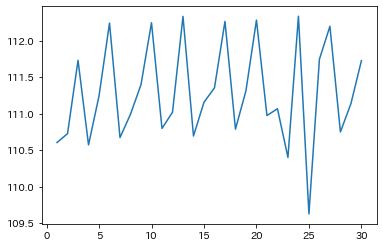

In [51]:
price = syurui[:,6]
day = np.arange(1,31)
plt.plot(day,price)

In [52]:
price_ = np.exp(test_output[0]) - 1
price_.shape

(30, 16)

In [53]:
result = price_.T.ravel()
result.shape

(480,)

In [54]:
datetime = pd.date_range('2022-05-02',periods=30)
string_list = []
for i in range(len(TRdata['kind'])): #16
    for j in range(len(datetime)): #30
        string_list.append(TRdata['kind'][i]+'_'+datetime[j].strftime('%Y-%m-%d'))
        
df = pd.DataFrame(result, index = string_list,columns=['mode_price'])
df.index.name = 'kind_'
df = df.reset_index()

df['kind'] = df.kind_.apply(lambda x: '_'.join(x.split('_')[:-1]))
df['date'] = df.kind_.apply(lambda x: x.split('_')[-1])
df['date'] = df.date.apply(lambda x: x.replace('-', ''))

df_pred = df[['kind','date','mode_price']]
df_pred

,kind,date,mode_price
0,だいこん,20220502,973.119141
1,だいこん,20220503,974.417786
2,だいこん,20220504,983.310181
3,だいこん,20220505,959.181824
4,だいこん,20220506,968.410339
...,...,...,...
475,ミニトマト,20220527,138.267044
476,ミニトマト,20220528,139.427216
477,ミニトマト,20220529,136.141052
478,ミニトマト,20220530,135.839661


In [55]:
sub_raw['date'] = sub_raw['date'].astype(str)
sub_raw

,kind,date,mode_price
0,だいこん,20220502,0
1,だいこん,20220506,0
2,だいこん,20220507,0
3,だいこん,20220509,0
4,だいこん,20220510,0
...,...,...,...
315,ミニトマト,20220526,0
316,ミニトマト,20220527,0
317,ミニトマト,20220528,0
318,ミニトマト,20220530,0


In [56]:
df_result = pd.merge(sub_raw.drop("mode_price", axis=1), df_pred, how="left", on=["kind", "date"])
df_result

,kind,date,mode_price
0,だいこん,20220502,973.119141
1,だいこん,20220506,968.410339
2,だいこん,20220507,987.435974
3,だいこん,20220509,964.391602
4,だいこん,20220510,969.285339
...,...,...,...
315,ミニトマト,20220526,133.516541
316,ミニトマト,20220527,138.267044
317,ミニトマト,20220528,139.427216
318,ミニトマト,20220530,135.839661


## CSVファイル出力

In [57]:
df_result.to_csv("result_LSTM.csv", index=False, encoding="utf_8_sig")